In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
# Load the dataset
df = pd.read_csv('email_classification.csv')

In [3]:
# Assuming 'email' column contains text and 'label' column contains labels
X = df['email']
y = df['label']

In [4]:
# Convert text data into numerical features using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X_tfidf = tfidf_vectorizer.fit_transform(X)


In [5]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [6]:
# Initialize SVM classifier
svm_classifier = SVC(kernel='linear')  # Use linear kernel for text data

In [7]:
# Train the SVM model
svm_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

         ham       1.00      1.00      1.00        14
        spam       1.00      1.00      1.00        22

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



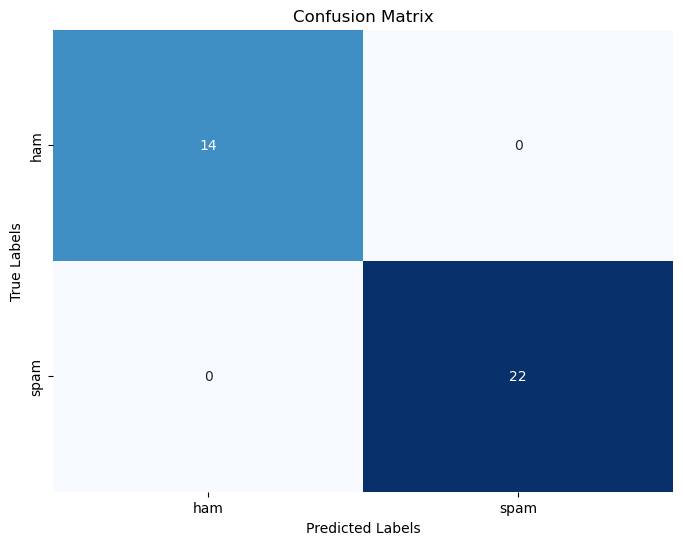

In [8]:
# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=svm_classifier.classes_, yticklabels=svm_classifier.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

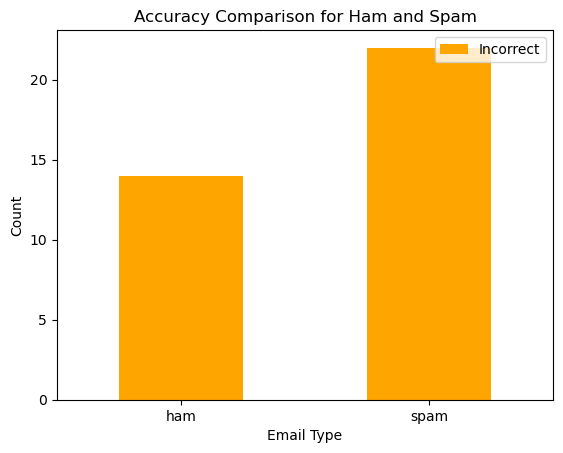

In [9]:
# Create a bar graph for accuracy comparison
accuracy_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
accuracy_df['Correct'] = accuracy_df['Actual'] == accuracy_df['Predicted']
accuracy_counts = accuracy_df.groupby(['Actual', 'Correct']).size().unstack(fill_value=0)
accuracy_counts.plot(kind='bar', stacked=True, color=['orange', 'blue'])
plt.xlabel('Email Type')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title('Accuracy Comparison for Ham and Spam')
plt.legend(['Incorrect', 'Correct'], loc='upper right')
plt.show()

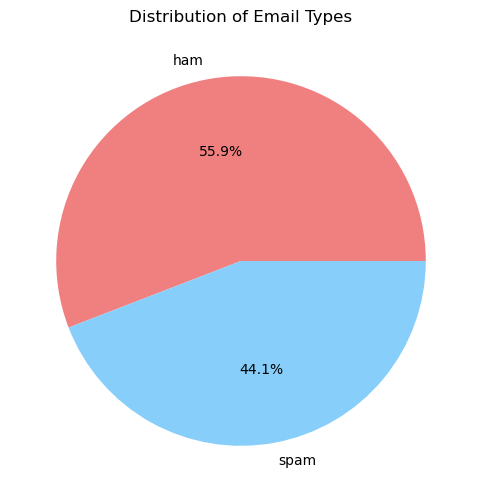

In [10]:
# Create a pie chart for class distribution
plt.figure(figsize=(6, 6))
df['label'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Distribution of Email Types')
plt.ylabel('')
plt.show()
